In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Our Dataset

This is Iris dataset. It is the Hello World! of Machine Learning. This dataset consists of instances of 3 types of Iris flower as

- Iris Versicolor
- Iris Setosa
- Iris Virginica

and their individual 4 different features as

- Sepal Length Cm
- Sepal Width Cm
- Petal Length Cm
- Petal Width Cm

Our task is to classify these individual instances according to their characteristic features

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png">

In [156]:
df = pd.read_csv('Iris.csv') ## Load data

In [157]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [159]:
df.columns.unique

<bound method Index.unique of Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')>

What we are trying to do is Binomial Logistic Regression which is classifying instances whether or not they are 

In [160]:
df_binary = df[df["Species"] != 'Iris-versicolor'] # Drop 3rd Class
df_binary = df_binary.drop(["Id"], axis=1)
df_binary["Species"] = np.where(df_binary["Species"] == 'Iris-setosa', 1.0, df_binary["Species"])
df_binary["Species"] = np.where(df_binary["Species"] == 'Iris-virginica', 0.0, df_binary["Species"])
df_binary.Species = pd.to_numeric(df_binary.Species) # Convert to the numerical values
df_binary.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


In [161]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [162]:
cls = df_binary["Species"]
df_binary = df_binary.drop(["Species"],axis=1)
data = list(zip(df_binary.to_numpy(),cls))
data[:5]

[(array([5.1, 3.5, 1.4, 0.2]), 1.0),
 (array([4.9, 3. , 1.4, 0.2]), 1.0),
 (array([4.7, 3.2, 1.3, 0.2]), 1.0),
 (array([4.6, 3.1, 1.5, 0.2]), 1.0),
 (array([5. , 3.6, 1.4, 0.2]), 1.0)]

In [163]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=0)
rs.get_n_splits(data)
x_train = []
x_test = []
for train_index, test_index in rs.split(data):
    x_train = [data[i] for i in train_index]
    x_test = [data[i] for i in test_index]

## Data Point

After we assign our training and test set, we now have datapoints in our vector-space. What do we mean is that our each individual flower is a vector in a space where every object in this space can exist only by their numerical attributes.

Iris_flower_named_Jeff  = \[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm\]

Jeff is a "Iris Setosa" type of flower so he has class of "1.0"


<img src="https://www.chicagobotanic.org/sites/default/files/styles/header-imagebreakpoints_theme_bootstrap_screen-xs-max_2x/public/banner_iris_0.jpg?itok=tpP9BRkV&timestamp=1572992483" style="width:400px;height:300px">

### This is Jeff



In [164]:
instance = (np.array(feature_size), # features
            0.0 or 1.0) # class

## Classifier Function

There is not only Jeff on this plane but there 99 more flowers on this plane. Since the flowers with relative features are close to each other, we are going to classify them according to with a separator function formula below

\begin{align*}
w^T \cdot x + b = 0
\end{align*}


<img src="https://image.slidesharecdn.com/svm-140807035301-phpapp01/95/support-vector-machine-without-tears-6-638.jpg?cb=1407384107" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width:50%;
  height:50%;
  ">


In [165]:
feature_size = 4
weights = np.zeros(feature_size,dtype=float)
bias = 0

In [166]:
def classifier(instance):
    # Not a probability but a number
    # y = w.x + b 
    return np.dot(weights,instance[0]) + bias

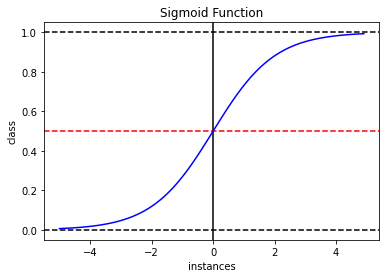

In [167]:
def sigmoid(x):
	return 1 / (1 + np.exp(-x))   

t1 = np.arange(-5.0, 5.0, 0.1)

fig = plt.figure()
plt.axvline(color="black")
plt.axhline(y=0,color="black",linestyle="--") # 0 Prediction
plt.axhline(y=0.5,color="red",linestyle="--") # Decision boundary
plt.axhline(y=1.0,color="black",linestyle="--") # 1 Prediction

plt.xlabel("instances")
plt.ylabel("class")
plt.title("Sigmoid Function")
plt.plot(t1, sigmoid(t1), 'b-')

plt.show()

In [168]:
def cross_entropy_loss(data, batch_size):

    cost = 0
    for instance in data:
        cost += (predict(instance) * np.log(sigmoid(classifier(instance))) + ((1-instance[1])*np.log(1-sigmoid(classifier(instance)))))

    return cost / batch_size

### Prediction Function



\begin{align*}
g(\sigma(w^T.x_i + b)) = 
\begin{cases}
    \text{if } P>0.5,& 1\\
    \text{otherwise}, & 0
\end{cases}
\end{align*}


In [169]:
def predict(instance):
    P = sigmoid(classifier(instance))
    if (P > 0.5):
        return 1
    return 0

## Mathematical Notations


$\Theta$ = Parameter Vector

$\hat{\Theta}$ = Updated Parameter Vector

$w_i$ = Vector Dimension

$\hat{w_i}$ = Vector Dimension

$y$ = Actual class of the instance

$\hat{y}$ = Predicted class 

$b$ = Bias

$\eta$ = Learning rate

$m$ = Batch Size(Set of Data Instances)

# Gradient Descend

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Logistic Regression and weights in neural networks.



<img src="https://miro.medium.com/max/700/1*P7z2BKhd0R-9uyn9ThDasA.png">

## Stochastic Gradient Descend


For each iteration over training data:

\begin{align*}
\hat{w_i} = w_i - \eta.[{\sigma(x) - y_i].x_i}
\end{align*}

<img src="formula.png" style="display:block;
                            margin-left: auto;
                            margin-right: auto;
                              width:75%;
                              height:75%;
                              ">

Our updated vector denoted as:

\begin{align*}
\hat{\Theta} = \Theta - \eta.[{\sigma(x) - y].x_i}
\end{align*}

In [19]:
LEARNING_RATE = 0.001

weights = np.zeros(feature_size,dtype=float)
bias = 0

costs = []

for instance in x_train:
    
    weights[0] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][0]
    weights[1] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][1]
    weights[2] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][2]
    weights[3] -= LEARNING_RATE * (sigmoid(classifier(instance))-instance[1])*instance[0][3]

    bias -= LEARNING_RATE * (sigmoid(classifier(instance)) * instance[1])

    costs.append(-1*cross_entropy_loss(data=x_train,batch_size=len(x_train)))

[0. 0. 0. 0.]


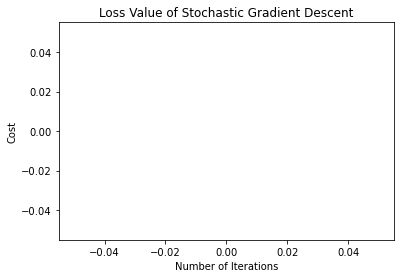

In [170]:
iterations = range(len(costs))
plt.plot(iterations,costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Loss Value of Stochastic Gradient Descent")
# Why?? you should able to explain it
print(weights)

## Batch Gradient Descend

In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.
Batch Gradient Descent is great for convex or relatively smooth error manifolds. In this case, we move somewhat directly towards an optimum solution.

For every weight:

\begin{align*}
\hat{w_i} = w_i - \eta.\frac{1}{m}\sum_{m=1}^{m}[{\sigma(x) - y_i].x_i}
\end{align*}


We update our changes:

\begin{align*}
\hat{\Theta} = \Theta - \eta.\frac{1}{m}\sum_{m=1}^{m}[{\sigma(x) - y].x_i}
\end{align*}


In [171]:
LEARNING_RATE = 0.001
# Select small find 
# Example --> 0.5 optimazed
#                   then configurate over this value

# Try to use 
weights = np.zeros(feature_size,dtype=float) # [0,0,0,0]
bias = 0

costs = []
epoch = 0
batch_size = 75
while epoch < 10000:

    weight_0_loss = weight_1_loss = weight_2_loss = weight_3_loss = bias_loss = 0

    for instance in x_train[:batch_size]:

        # Logistic Regression/:Regularization parameter Fine-Tuning(Optimization)--> Stack Overflow/Research Gate

        weight_0_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][0]
        weight_1_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][1]
        weight_2_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][2]
        weight_3_loss += (sigmoid(classifier(instance))-instance[1]) * instance[0][3]

        bias_loss +=  sigmoid(classifier(instance)) - instance[1]

    costs.append(-1*cross_entropy_loss(data=x_train,batch_size=len(x_train)))

    weights[0] -= LEARNING_RATE * (weight_0_loss / batch_size)
    weights[1] -= LEARNING_RATE * (weight_1_loss / batch_size)
    weights[2] -= LEARNING_RATE * (weight_2_loss / batch_size)
    weights[3] -= LEARNING_RATE * (weight_3_loss / batch_size)

    bias -= LEARNING_RATE * (bias_loss / batch_size)
    
    epoch += 1

Text(0.5, 1.0, 'Loss Value of Batch Gradient Descent')

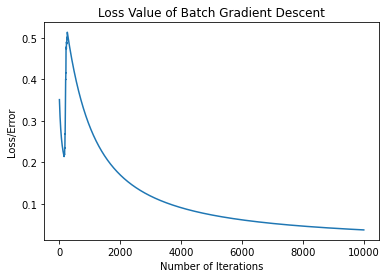

In [174]:
iterations = list(range(len(costs)))
plt.plot(iterations, costs)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss/Error")
plt.title("Loss Value of Batch Gradient Descent")
# Look and try to explain the initial value

## What is the difference?

<img src="https://miro.medium.com/max/638/1*9uoUzBx_08jcoPgb8CyMLA.png">


In [175]:
def evaluation(data):
    tp = fp = tn = fn = 0
    for i in range(len(data)):
        if x_test[i][1] == 1:
            if predict(data[i]) == 1:
                tp += 1
            else:
                fn += 1
        elif x_test[i][1] == 0:
            if predict(data[i]) == 0:
                tn += 1
            else:
                fp += 1

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2*(precision*recall)/(precision+recall)
    
    return precision, recall, f1


precision, recall, f1 = evaluation(x_test)

print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F-1 Score: {f1}")


Precision Score: 1.0
Recall Score: 1.0
F-1 Score: 1.0


# Multinomial Logistic Regression

In [188]:
df = pd.read_csv('Iris.csv') ## Load data

In [189]:
df = df.drop(["Id"], axis=1)
df["Species"] = np.where(df["Species"] == 'Iris-setosa', "100", df["Species"])
df["Species"] = np.where(df["Species"] == 'Iris-versicolor', "010", df["Species"])
df["Species"] = np.where(df["Species"] == 'Iris-virginica', "001", df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,100
2,4.7,3.2,1.3,0.2,100
3,4.6,3.1,1.5,0.2,100
4,5.0,3.6,1.4,0.2,100


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [191]:
cls = df["Species"]
df = df.drop(["Species"],axis=1)
data = list(zip(df.to_numpy(),cls))

In [192]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=0)
rs.get_n_splits(data)
x_train = []
x_test = []
for train_index, test_index in rs.split(data):
    x_train = [data[i] for i in train_index]
    x_test = [data[i] for i in test_index]

In [193]:
def classifier(instance):
    # Not a probability but a number
    # y = w.x + b 
    return np.dot(weights,instance[0]) + bias

In [194]:
def softmax(x):
	return np.exp(x) / (np.sum(np.exp(x)))

In [195]:
feature_size = 4
target = 3
weights = np.zeros((feature_size,target),dtype=float)
bias = np.zeros((target), dtype=float)

In [196]:
def predict(instance):
    predictions = softmax(classifier(instance))
    if (predictions[0] > predictions[1] and predictions[0] > predictions[2]):
        return "100"
    elif  (predictions[1] > predictions[0] and predictions[1] > predictions[2]):
        return "010"
    elif  (predictions[2] > predictions[0] and predictions[2] > predictions[1]):
        return "001"

In [197]:
def cross_entropy_loss(data, batch_size):
    cost = 0
    for instance in data:

        for i, t in enumerate(list(predict(instance))):

            cost += int(t) * np.log(softmax(classifier(instance))[i]) + ((1-instance[1][i]) * np.log(1 - softmax(classifier(instance))[i]))

    return cost / batch_size

In [212]:
LEARNING_RATE = 0.01
# Select small find 
# Example --> 0.5 optimazed
#                   then configurate over this value

# Try to use 
feature_size = 4
target = 3
weights = np.zeros((target,feature_size))
bias = np.zeros((target),dtype=float)

costs = []
epoch = 0
batch_size = 75
while epoch < 1000:

    loss_matrix = np.zeros((target,feature_size+1))
   
    for instance in x_train[:batch_size]:

        # Logistic Regression/:Regularization parameter Fine-Tuning(Optimization)--> Stack Overflow/Research Gate
        for i, t in enumerate(list(instance[1])):

            loss_matrix[i][0] += (softmax(classifier(instance))[i]-int(t)) * instance[0][0]
            loss_matrix[i][1] += (softmax(classifier(instance))[i]-int(t)) * instance[0][1]
            loss_matrix[i][2] += (softmax(classifier(instance))[i]-int(t)) * instance[0][2]
            loss_matrix[i][3] += (softmax(classifier(instance))[i]-int(t)) * instance[0][3]

            loss_matrix[i][4] +=  softmax(classifier(instance))[i] - int(t)

    #costs.append(-1*cross_entropy_loss(data=x_train,batch_size=len(x_train)))

    for i, t in enumerate(list(instance[1])):

        weights[i][0] -= LEARNING_RATE * (loss_matrix[i][0] / batch_size)
        weights[i][1] -= LEARNING_RATE * (loss_matrix[i][1] / batch_size)
        weights[i][2] -= LEARNING_RATE * (loss_matrix[i][2] / batch_size)
        weights[i][3] -= LEARNING_RATE * (loss_matrix[i][3] / batch_size)

        bias[i] -= LEARNING_RATE * (loss_matrix[i][4] / batch_size)

    epoch += 1

In [208]:
LEARNING_RATE = 0.01

weights = np.zeros((target,feature_size))
bias = np.zeros((target),dtype=float)

print(weights)
print(bias)

costs = []

for instance in x_train:
    
    for i, t in enumerate(list(instance[1])):
        weights[i][0] -= LEARNING_RATE * (softmax(classifier(instance))[i]-int(t))*instance[0][0]
        weights[i][1] -= LEARNING_RATE * (softmax(classifier(instance))[i]-int(t))*instance[0][1]
        weights[i][2] -= LEARNING_RATE * (softmax(classifier(instance))[i]-int(t))*instance[0][2]
        weights[i][3] -= LEARNING_RATE * (softmax(classifier(instance))[i]-int(t))*instance[0][3]

        bias[i] -= LEARNING_RATE * (softmax(classifier(instance))[i] * int(t))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0. 0. 0.]


In [213]:
def evaluation(data):
    tp = fp = tn = fn = 0
    for i in range(len(data)):
        if x_test[i][1] == "100":
            if predict(data[i]) == "100":
                tp += 1
            else:
                fp += 1
        elif x_test[i][1] == "010":
            if predict(data[i]) == "010":
                tp += 1
            else:
                fp += 1
        elif x_test[i][1] == "001":
            if predict(data[i]) == "001":
                tp += 1
            else:
                fp += 1

    precision = tp / (tp + fp)

    return precision


precision = evaluation(x_test)

print(f"Precision Score: {precision}")

Precision Score: 0.7894736842105263
